In [52]:
# import python libraries

import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Global-Superstore.csv', encoding= 'unicode_escape') #loading dataset

In [7]:
df.shape

(51290, 24)

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,07/31/2012,07/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,02/05/2013,02/07/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,01/28/2013,01/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/05/2013,11/06/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

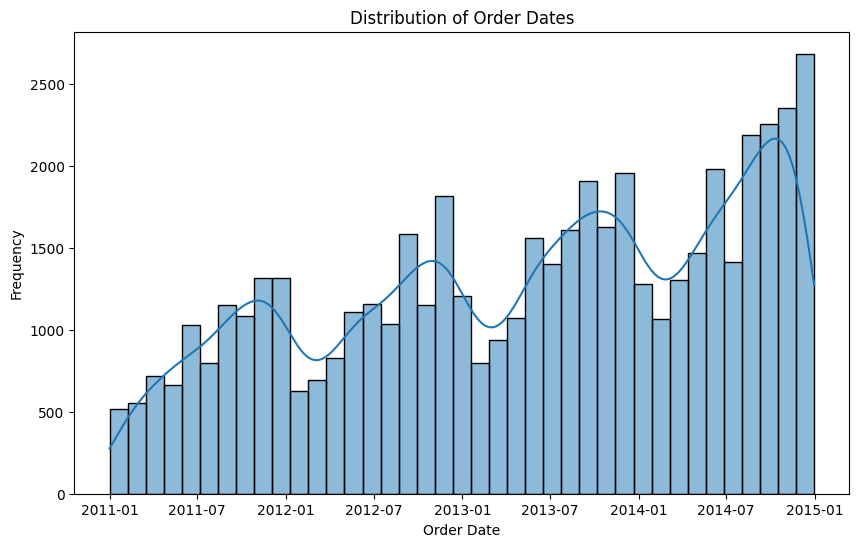

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Date'], kde=True)
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.show()


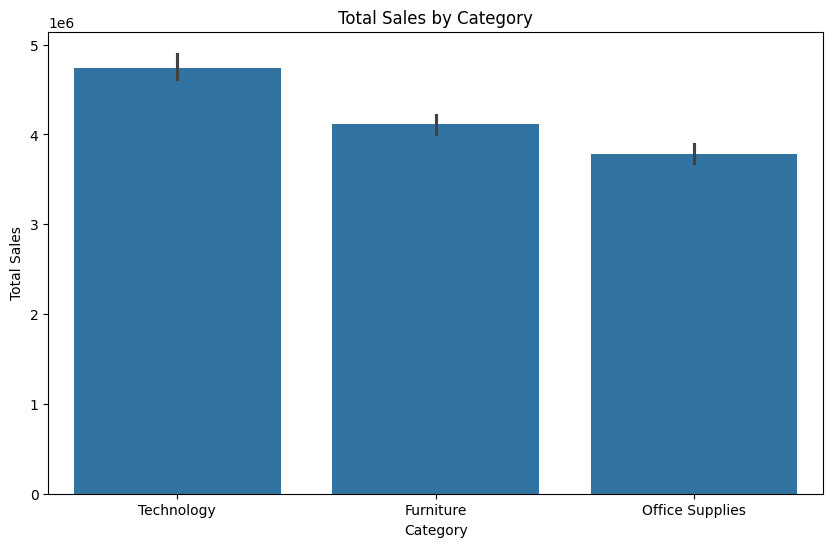

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


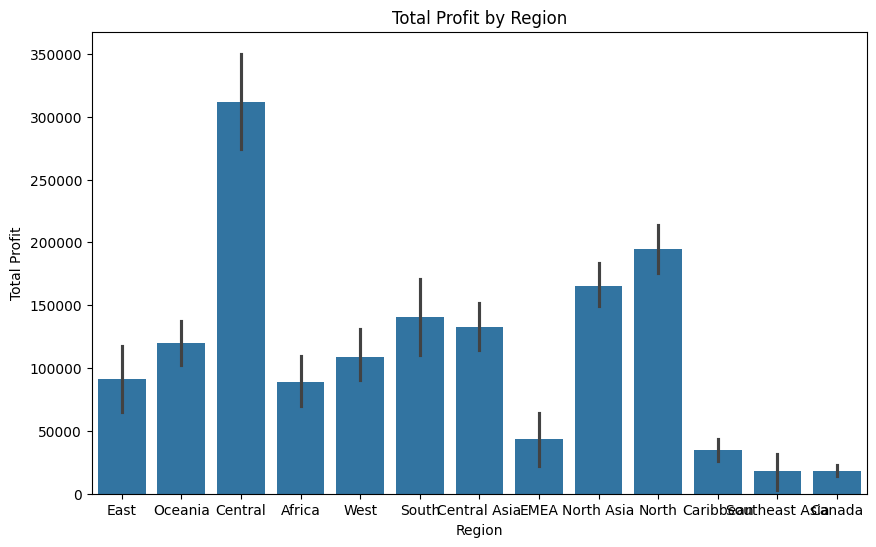

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


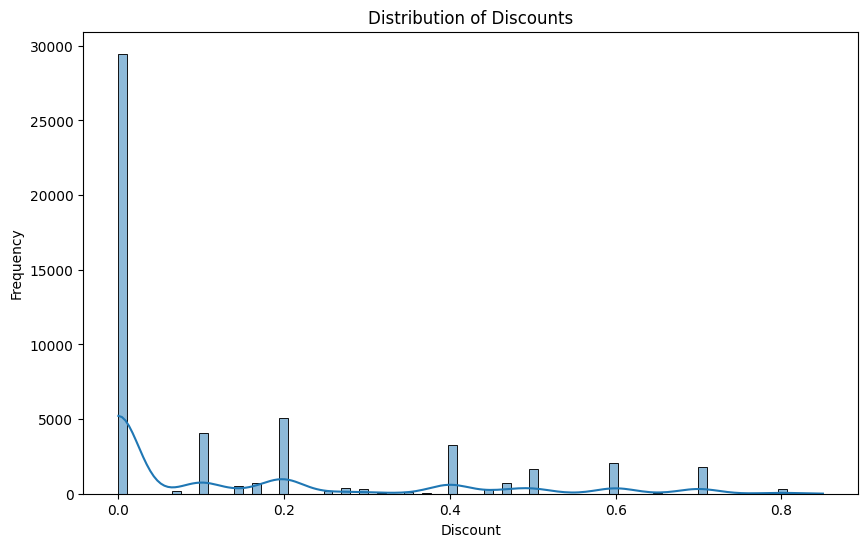

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


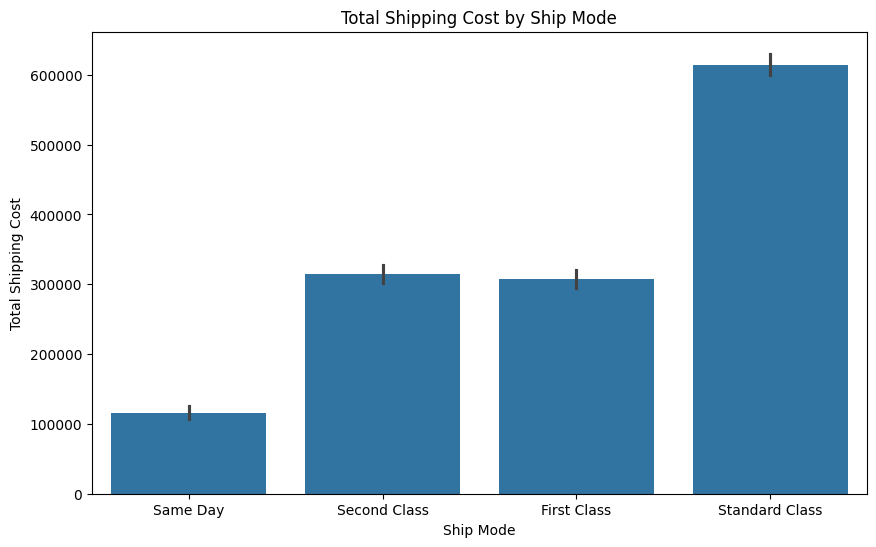

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Shipping Cost', data=df, estimator=sum)
plt.title('Total Shipping Cost by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Shipping Cost')
plt.show()


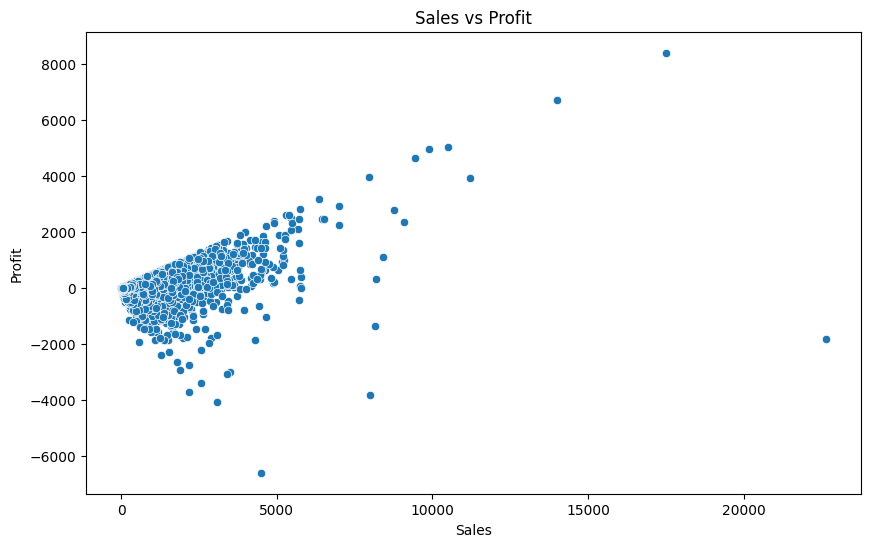

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


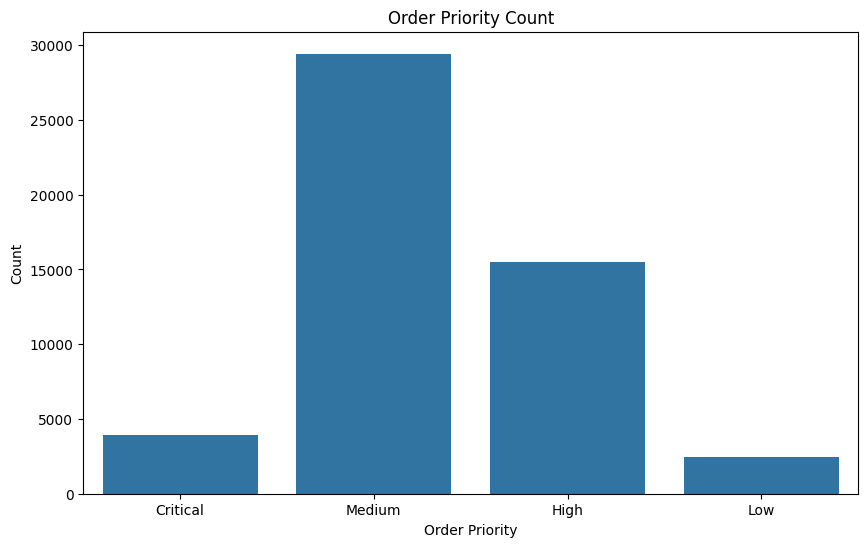

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Priority', data=df)
plt.title('Order Priority Count')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.show()


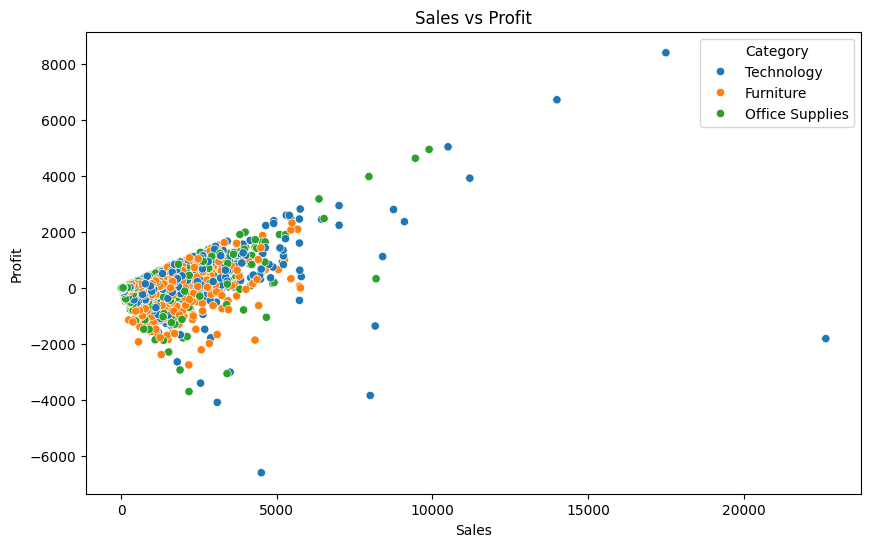

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


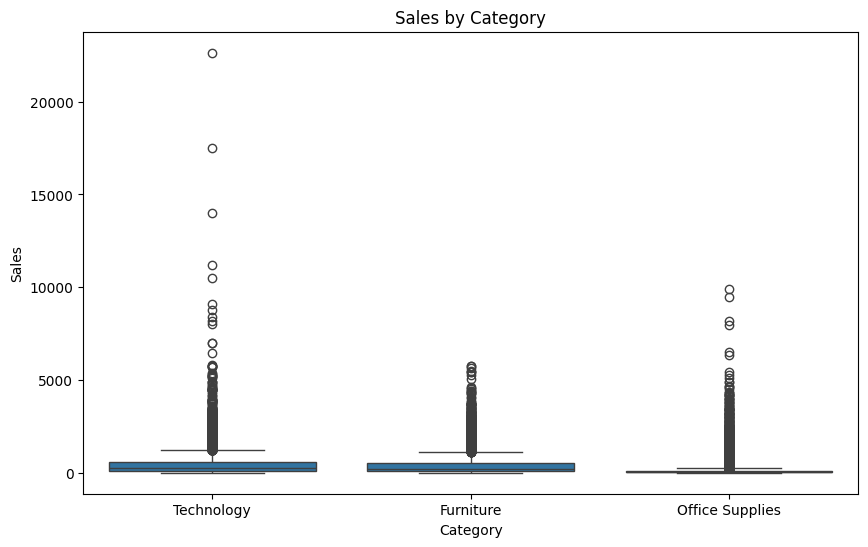

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


C:\Users\abhishek ranjan\AppData\Local\Temp\ipykernel_22136\657366472.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



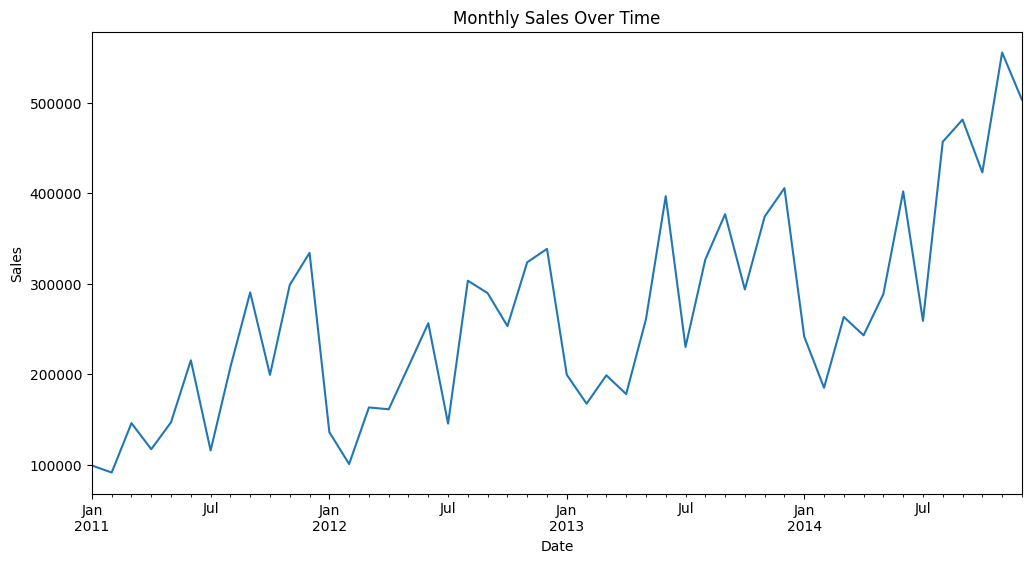

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Plotting Sales over time
plt.figure(figsize=(12, 6))
df['Sales'].resample('M').sum().plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


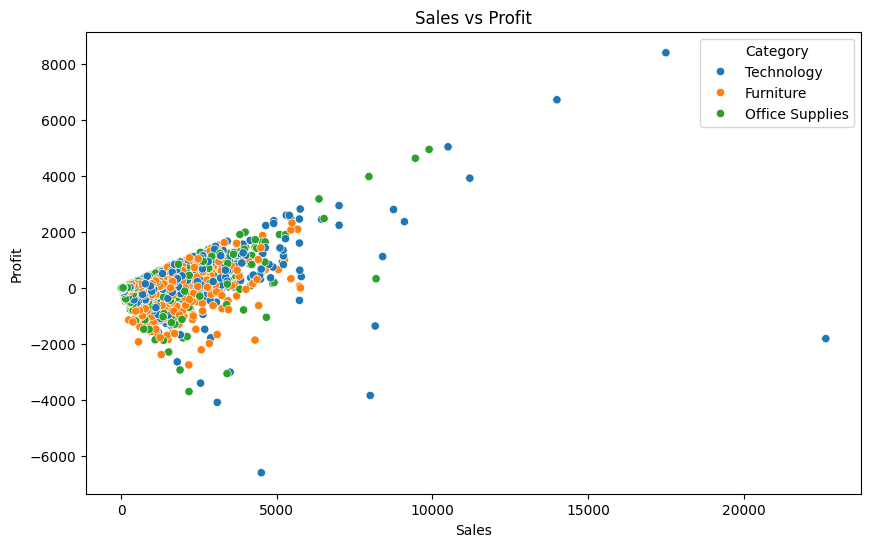

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


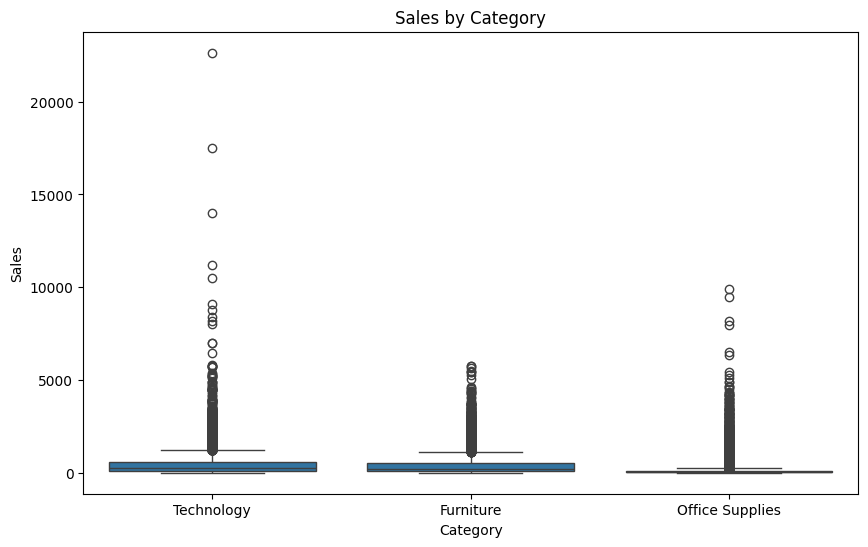

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


In [42]:
#Defining numerical Column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


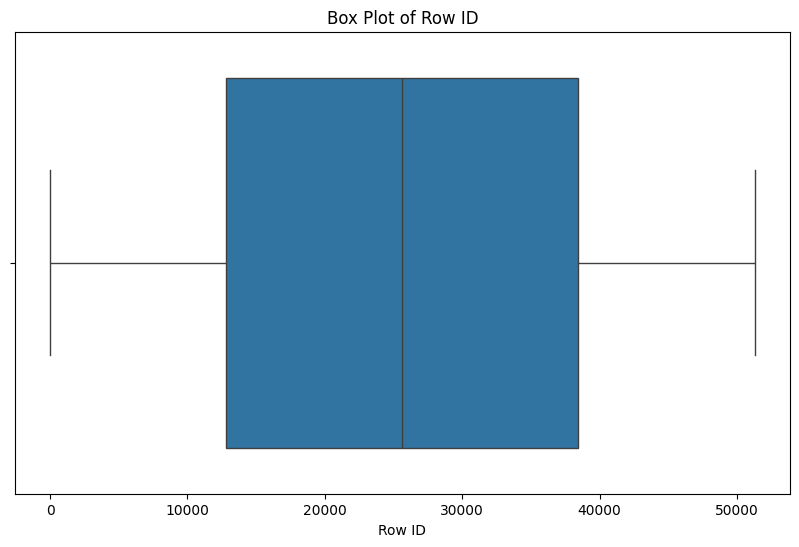

ValueError: cannot reindex on an axis with duplicate labels

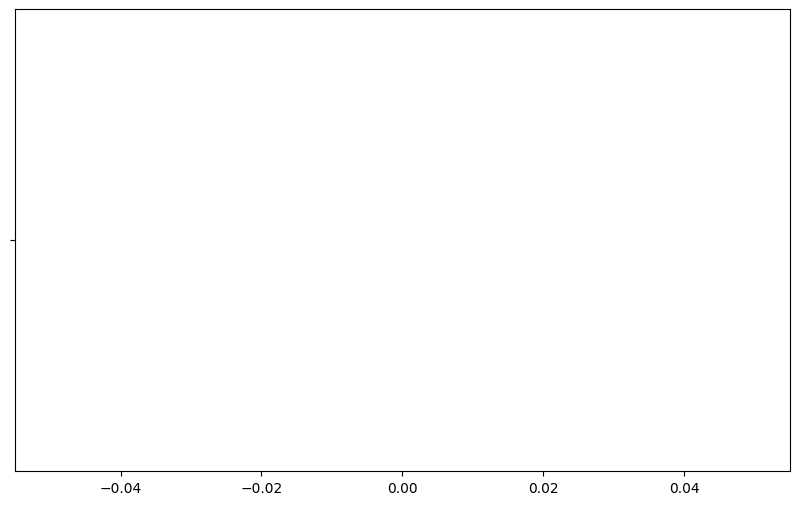

In [43]:
#Outlier Detection and Handling
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()
    
    # Handling outliers by capping
    upper_limit = df[col].mean() + 3*df[col].std()
    lower_limit = df[col].mean() - 3*df[col].std()
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])


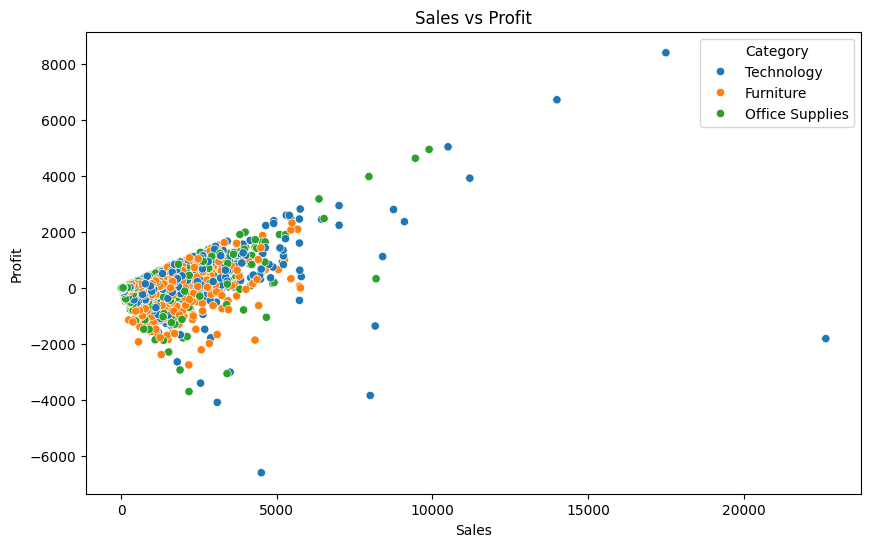

In [44]:
#scatter plot for sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


In [46]:
#Creating interaction terms
df['Sales_Profit_Interaction'] = df['Sales'] * df['Profit']
print(df.head())
Log transformation to handle skewed distributions
df['Log_Sales'] = np.log1p(df['Sales'])
df['Log_Profit'] = np.log1p(df['Profit'])
print(df.head())


             Row ID         Order ID   Ship Date     Ship Mode Customer ID  \
Order Date                                                                   
2012-07-31  32298.0   CA-2012-124891  07/31/2012      Same Day    RH-19495   
2013-02-05  26341.0    IN-2013-77878  02/07/2013  Second Class    JR-16210   
2013-10-17  25330.0    IN-2013-71249  10/18/2013   First Class    CR-12730   
2013-01-28  13524.0  ES-2013-1579342  01/30/2013   First Class    KM-16375   
2013-11-05  47221.0     SG-2013-4320  11/06/2013      Same Day     RH-9495   

               Customer Name      Segment           City            State  \
Order Date                                                                  
2012-07-31       Rick Hansen     Consumer  New York City         New York   
2013-02-05     Justin Ritter    Corporate     Wollongong  New South Wales   
2013-10-17      Craig Reiter     Consumer       Brisbane       Queensland   
2013-01-28  Katherine Murray  Home Office         Berlin           B

C:\Users\abhishek ranjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log1p

C:\Users\abhishek ranjan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [47]:
#Group by Category and analyze mean Sales and Profit
category_group = df.groupby('Category')[['Sales', 'Profit']].mean().reset_index()
print(category_group)

# Plotting the group analysis
fig = px.bar(category_group, x='Category', y='Sales', title='Average Sales by Category')
fig.show()

fig = px.bar(category_group, x='Category', y='Profit', title='Average Profit by Category')
fig.show()


          Category       Sales     Profit
0        Furniture  416.248905  28.878567
1  Office Supplies  121.097120  16.578961
2       Technology  467.858939  65.454958


In [48]:
max_profit_row = df.loc[df['Profit'].idxmax()]

In [49]:
print(f"Product Name: {max_profit_row['Product Name']}")
print(f"Profit: {max_profit_row['Profit']}")

Product Name: Order Date
2013-10-03                Canon imageCLASS 2200 Advanced Copier
2013-10-03                             Enermax Memory Card, USB
2013-10-03                               Cuisinart Stove, White
2013-10-03                            Eldon Lockers, Wire Frame
2013-10-03            Ibico Ibimaster 300 Manual Binding System
2013-10-03                         Rogers Lockers, Single Width
2013-10-03                      Stanley Sketch Pad, Fluorescent
2013-10-03                       HP Personal Copier, High-Speed
2013-10-03                           Cisco Signal Booster, VoIP
2013-10-03                       Bush Floating Shelf Set, Metal
2013-10-03                        Safco 3-Shelf Cabinet, Mobile
2013-10-03                     Samsung Signal Booster, Cordless
2013-10-03                  Jiffy Business Envelopes, Set of 50
2013-10-03                        Canon Fax and Copier, Digital
2013-10-03                         BIC Highlighters, Easy-Erase
2013-10-03     

In [ ]:
# Overall  key finding
#More profit from Centre Region
#Maximum shiping Standard Class